In [1]:
library(tidyverse)
library(psych)

if(!require('readr')) {
    install.packages('readr')
    library('readr')
}

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [2]:
df_wdbc <- read.csv(paste("wdbc.csv","", sep=""))
df_wdbc$X<-NULL
df_wdbc$id<-NULL

In [3]:
head(df_wdbc)

,diagnosis,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave.points_1ean,sy11etry_1ean,⋯,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave.points_worst,sy11etry_worst,fractal_di1ension_worst
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [4]:
df_wdbc$diagnosis <- NULL

In [5]:
km.out<-kmeans(df_wdbc, centers=2, nstart=30)

In [6]:
# Inspect the result
summary(km.out)

             Length Class  Mode   
cluster      569    -none- numeric
centers       60    -none- numeric
totss          1    -none- numeric
withinss       2    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           2    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

In [7]:
# Print the cluster membership component of the model
km.out$cluster

# Print the km.out object
km.out

[1] 1 1 1 2 1 2 1 2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 2 1 1 1 2 1 1 1 1 2 1 1 1 1 2
 [38] 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2
 [75] 2 1 2 1 1 2 2 2 1 1 2 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
[112] 2 2 2 2 2 2 2 1 1 2 1 1 2 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 1 2 2 2 2 1 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2
[186] 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 1 2 2 2 2 1 2 2 1 2 1 2 2 2 2 2 1 1 2 2
[223] 2 2 2 2 2 2 2 2 1 2 2 1 2 2 1 1 2 1 2 2 2 2 1 2 2 2 2 2 1 2 1 1 1 2 1 2 1
[260] 2 1 1 1 2 1 1 2 2 2 2 2 2 1 2 1 2 2 1 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[297] 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2
[334] 2 2 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1
[371] 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2
[408] 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2
[445] 1 2 1 2 2 1 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
[482] 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1
[519] 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[556] 2 2 2 2 2 2 2 2 1 1 1 2 1 2

K-means clustering with 2 clusters of sizes 131, 438

Cluster means:
  radius_1ean texture_1ean peri1eter_1ean area_1ean s1oothness_1ean
1    19.37992     21.69458      128.23130 1185.9298       0.1012946
2    12.55630     18.57037       81.12347  496.0619       0.0948845
  co1pactness_1ean concavity_1ean concave.points_1ean sy11etry_1ean
1       0.14861298     0.17693947          0.10069878     0.1915397
2       0.09109982     0.06243776          0.03343254     0.1780580
  fractal_di1ension_1ean radius_se texture_se peri1eter_se  area_se
1             0.06060290 0.7428038   1.222538     5.250580 95.67817
2             0.06345402 0.3041909   1.215153     2.152881 23.78529
  s1oothness_se co1pactness_se concavity_se concave.points_se sy11etry_se
1   0.006598687     0.03217669   0.04241977        0.01567398  0.02030397
2   0.007173263     0.02347469   0.02874551        0.01063632  0.02061358
  fractal_di1ension_se radius_worst texture_worst peri1eter_worst area_worst
1          0.0039533

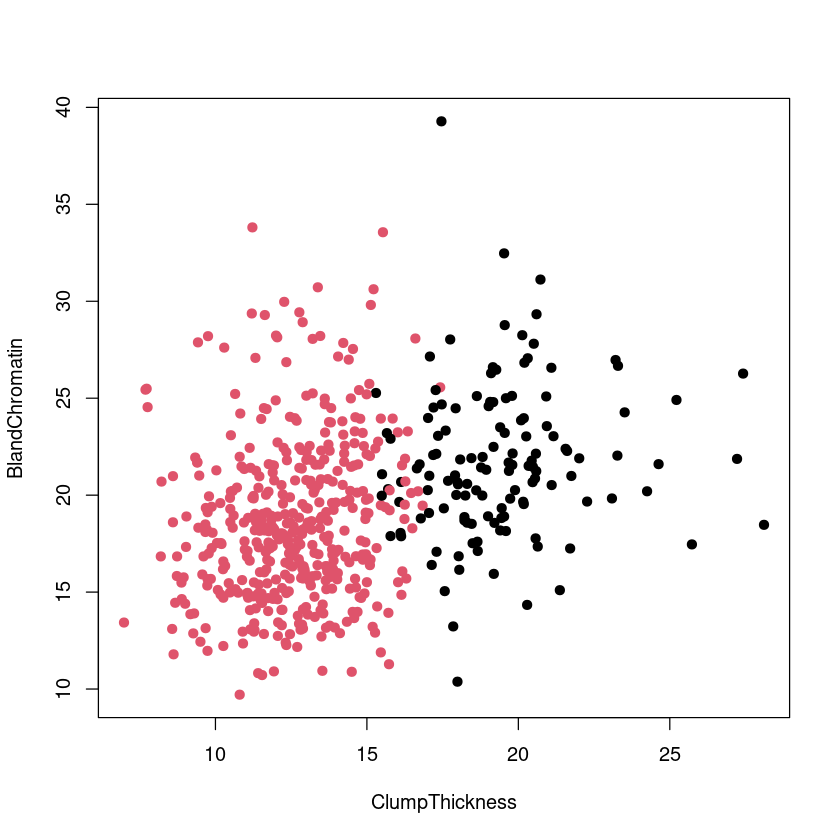

In [8]:
df_wdbc$cluster <- km.out$cluster

# Graficar los datos agrupados
plot(df_wdbc$radius_1ean, df_wdbc$texture_1ean, col = df_wdbc$cluster, 
     pch = 19, xlab = "ClumpThickness", ylab = "BlandChromatin")